# Word2Vec in Action

Please, please, please remember that almost all the libraries we use in this course come with documentation. The quality of the documentation, in terms of readability, varies, but it is almost always available. (Readability is also a function of your own expertise: as you get better, you'll find that you can get what you need even if the prose isn't terribly clear.)

The version of **Word2Vec** we are using this week is part of [Gensim](https://radimrehurek.com/gensim/index.html) an open source project started by a Czech scientist Rahim Radurek and is now maintained by a core group that is based around the world. [The documentation is pretty good](https://radimrehurek.com/gensim/models/word2vec.html).

<div class="alert alert-block alert-warning">
<b>One thing to note</b>: Gensim is licensed under the OSI-approved GNU LGPLv2.1 license. This means that it’s free for both personal and commercial use, but if you make any modification to Gensim that you distribute to other people, you have to disclose the source code of these modifications. Some organizations may not be comfortable tiw this. If so, a commercial license is available. (Also, note to yourself that licenses matter.</div>

In [3]:
# IMPORTS
import re
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# My usual preferences
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)

In [4]:
# Many of these libraries come with their own test data / toy corpora.
from gensim.test.utils import common_texts
print(common_texts[0:3])

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system']]


In [14]:
# Toy corpus
# Pretend we tokenized, lowered, and removed punctuation
sentences0 = [['i', 'like', 'apple', 'pie', 'for', 'dessert'],
            ['i', 'dont', 'drive', 'fast', 'cars'],
            ['data', 'science', 'is', 'fun'],
            ['chocolate', 'is', 'my', 'favorite'],
            ['my', 'favorite', 'movie', 'is', 'predator']]

## Basics of `Word2Vec`

**Word2Vec Parameters**
- `min_count` : the minimum number of times a word must occur to be included
- `size` : the length of the vector (it will otherwise create a vector for all the words)
- `window` : how many words to include on either side of the target word

In [6]:
#train word2vec model
model = Word2Vec(sentences = sentences,
                 window = 2, 
                 min_count =1,
                 vector_size = 5)

In [7]:
print(model.wv.get_normed_vectors())
model.wv.key_to_index

[[-0.03849567  0.01697168  0.3662972   0.64664733 -0.66776013]
 [-0.48855633  0.4433902   0.6159798  -0.34430027 -0.25834882]
 [ 0.6150827  -0.12779771 -0.37807605  0.546207   -0.40504012]
 [-0.13908541  0.2203119   0.07596576 -0.6345492  -0.7236674 ]
 [ 0.56792194  0.39380786  0.52490705  0.05931308  0.49328956]
 [-0.31370667 -0.0871837   0.53140837 -0.69290286 -0.3625989 ]
 [-0.52173674 -0.06459854  0.6624952  -0.508372   -0.16209805]
 [-0.17209898  0.7173913  -0.52674794  0.00401107 -0.42219922]
 [-0.6575294   0.34283596 -0.5997454  -0.30069652 -0.0024032 ]
 [-0.01832273 -0.47394884  0.5947988   0.30820608  0.57119185]
 [-0.6135583   0.33812973 -0.31115016  0.0620135   0.63918257]
 [-0.32604057  0.33008295 -0.49590695 -0.25927958  0.6867265 ]
 [-0.17525703  0.03570027 -0.45997098 -0.8534484  -0.16752042]
 [ 0.3487878  -0.1254084   0.7814713  -0.387367    0.3191695 ]
 [ 0.3806582   0.58229643 -0.10141748 -0.642459    0.30494434]
 [ 0.04833385  0.6290757  -0.06874801 -0.2230291  -0.73

{'is': 0,
 'i': 1,
 'favorite': 2,
 'my': 3,
 'drive': 4,
 'like': 5,
 'apple': 6,
 'pie': 7,
 'for': 8,
 'dessert': 9,
 'dont': 10,
 'predator': 11,
 'fast': 12,
 'movie': 13,
 'data': 14,
 'science': 15,
 'fun': 16,
 'chocolate': 17,
 'cars': 18}

In [8]:
print(model.wv['chocolate'])
print(model.wv.most_similar('chocolate', topn= 3))

[ 0.03717639  0.12177727 -0.09596102 -0.06214521  0.13595259]
[('predator', 0.8471102714538574), ('data', 0.8061100244522095), ('dont', 0.6006303429603577)]


In [9]:
x = model.wv.get_normed_vectors()
pca = PCA(n_components = 2)
result = pca.fit_transform(x)

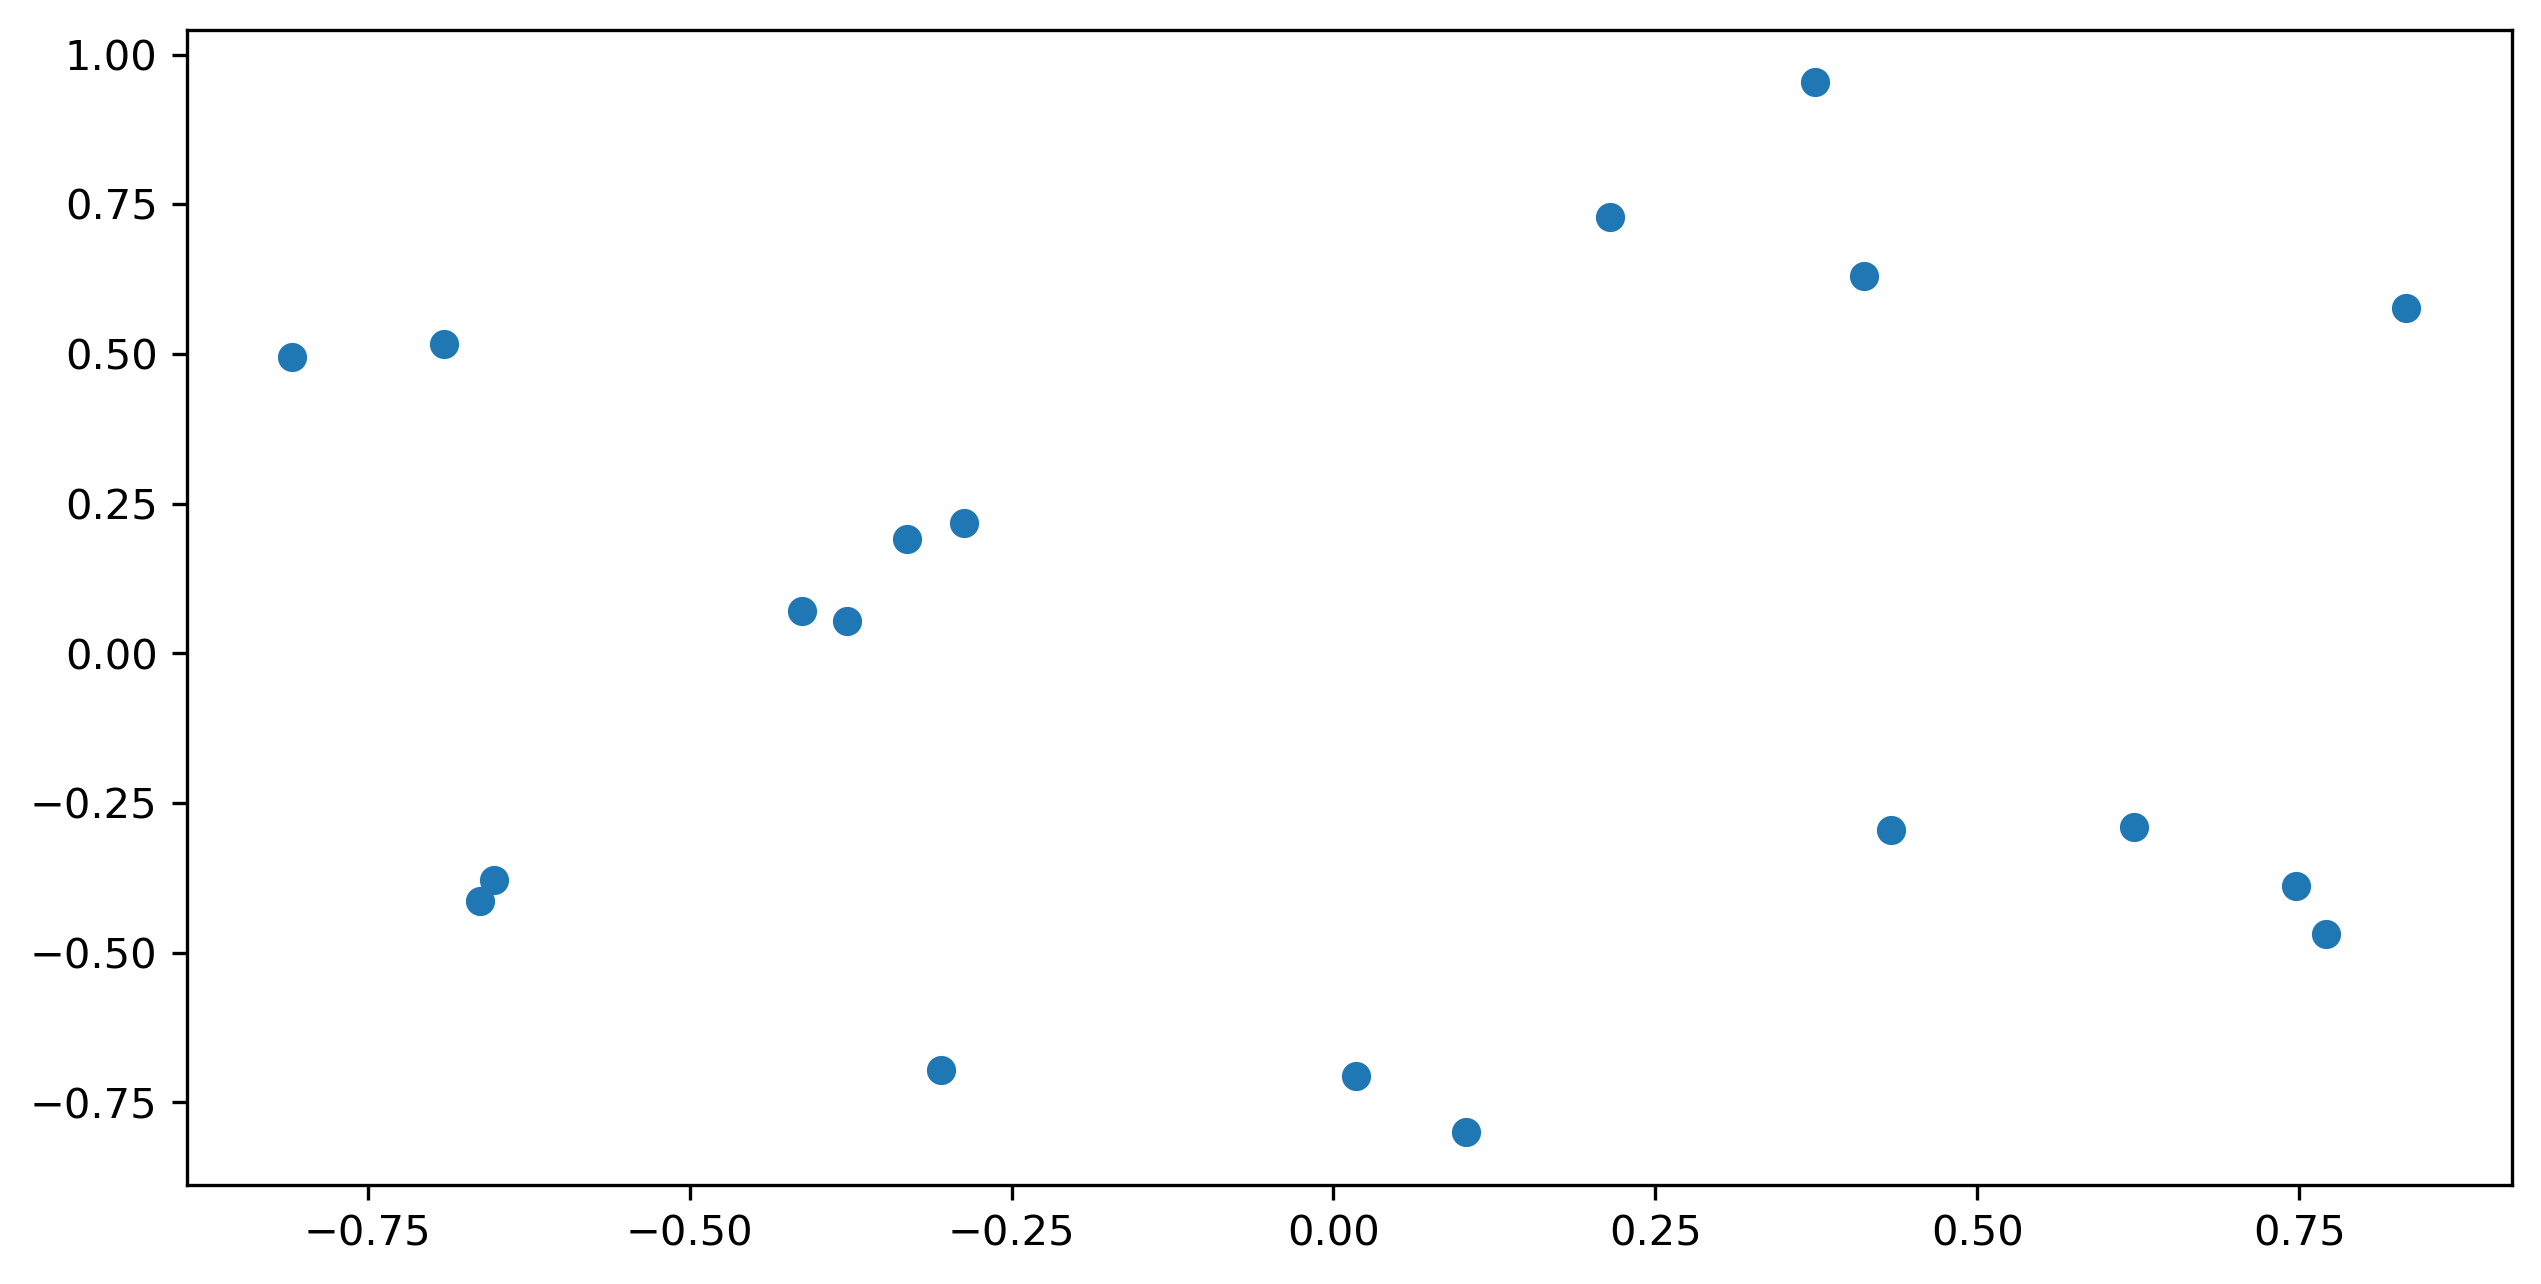

In [10]:
plt.scatter(result[:,0], result[:,1])
words = list

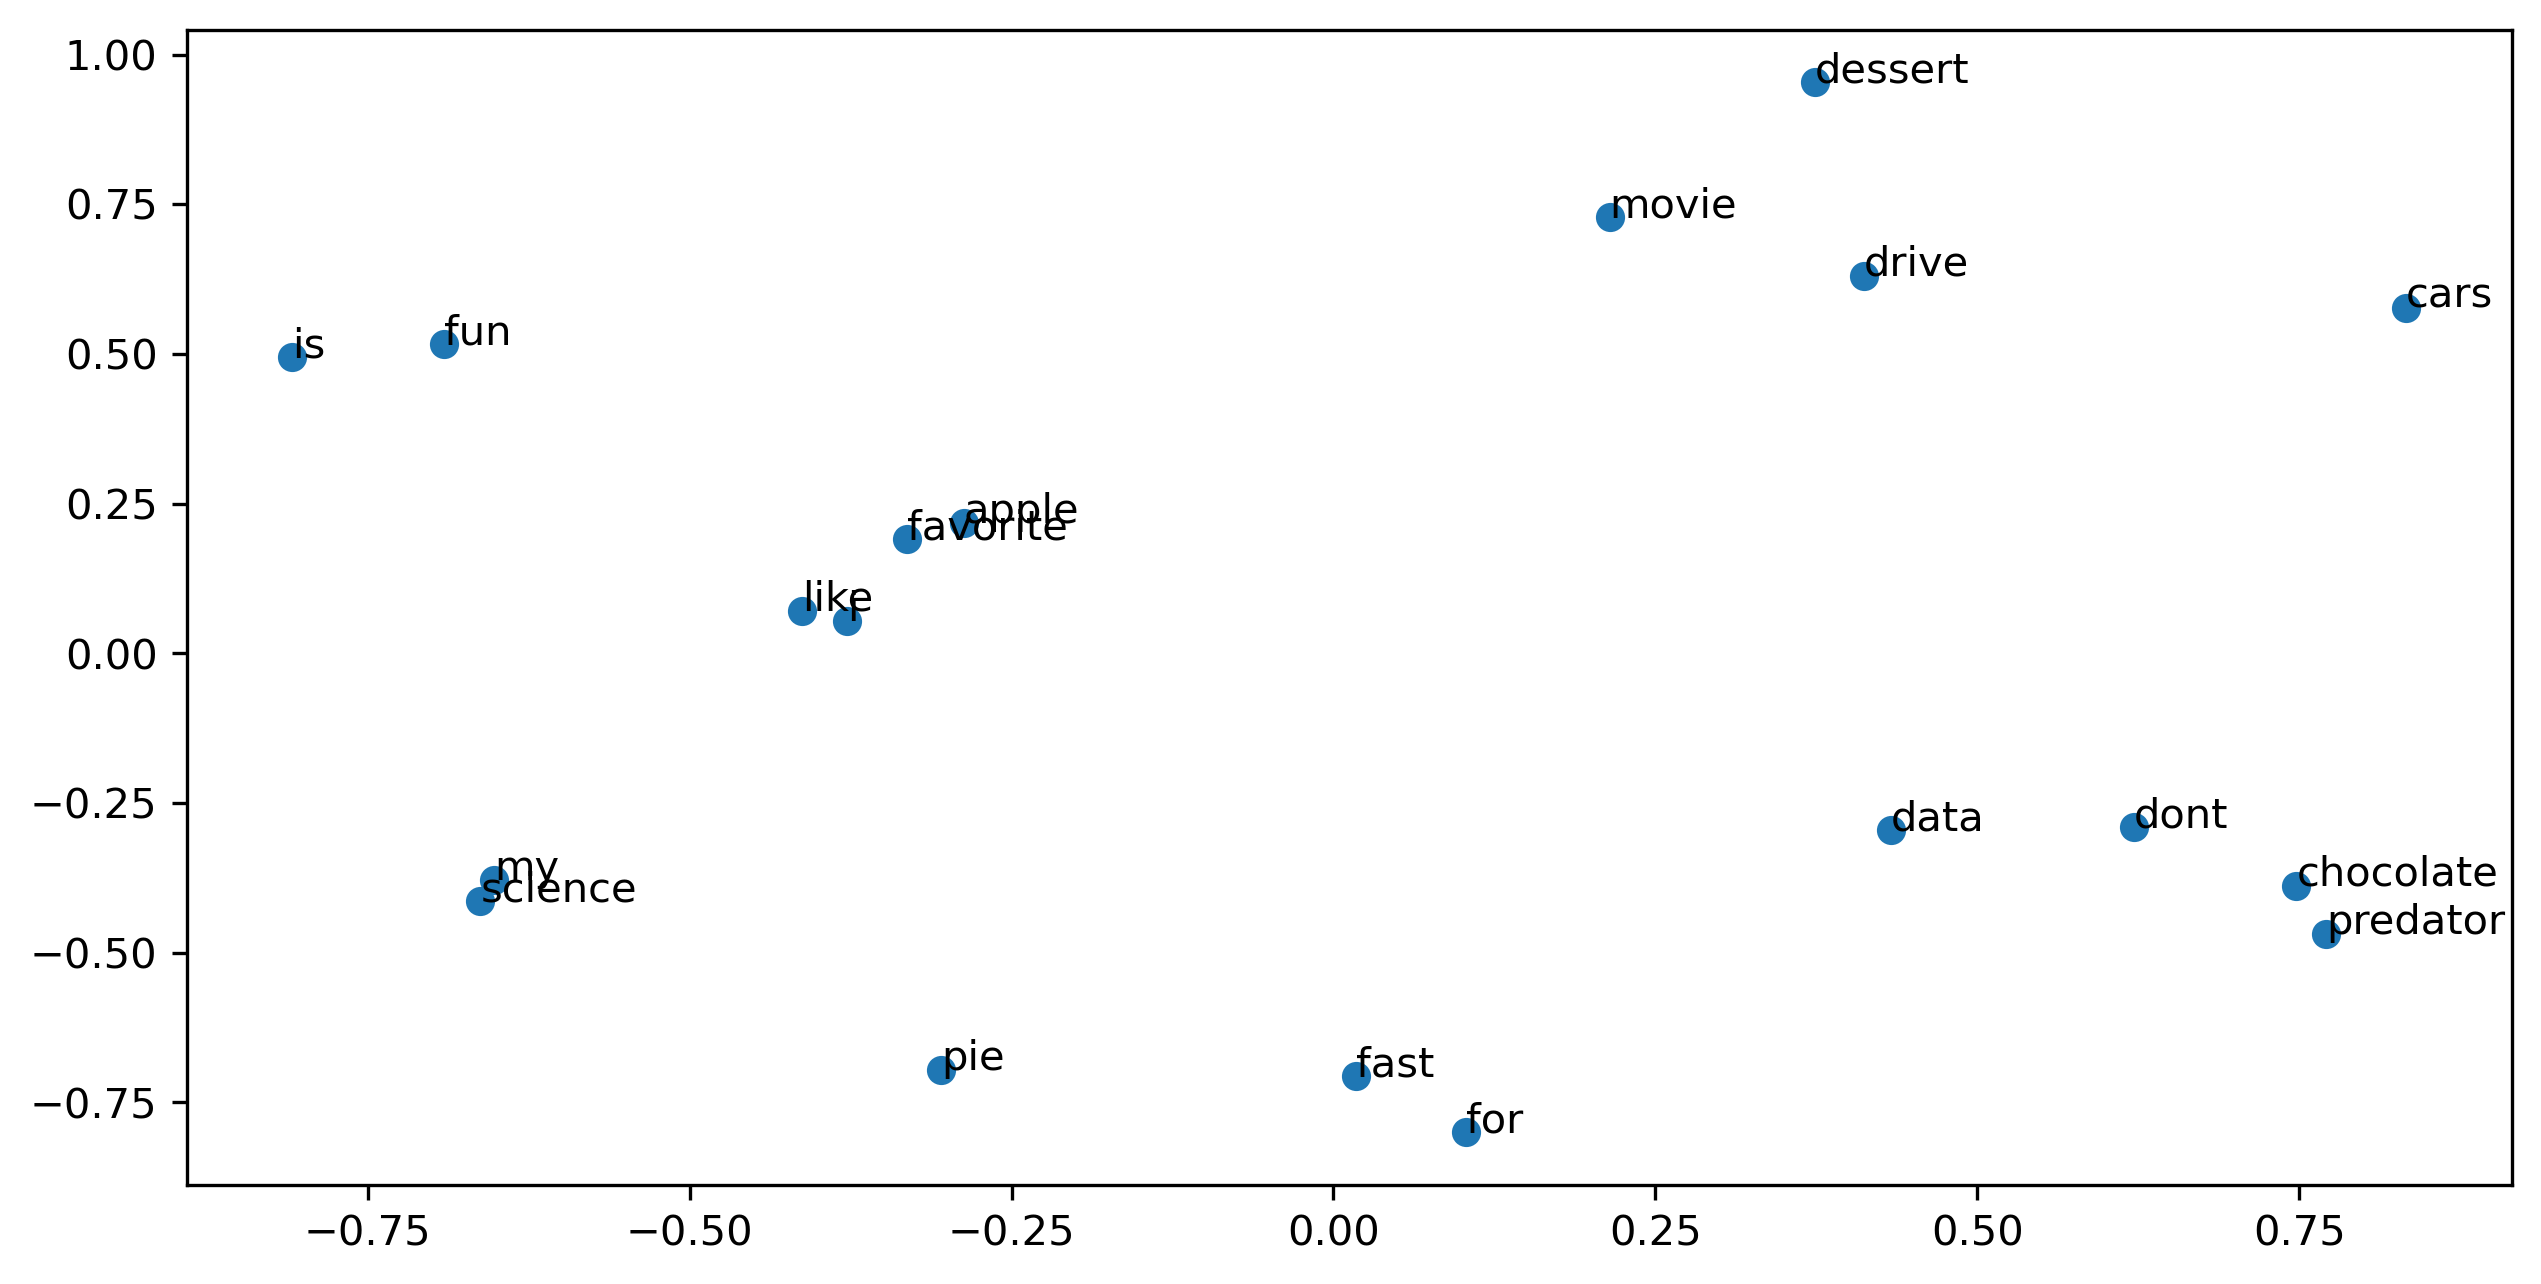

In [11]:
plt.scatter(result[:, 0], result[:, 1])

words = list(model.wv.index_to_key)

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [12]:
import pandas as pd
df = pd.DataFrame(model.wv.get_normed_vectors())
df['word'] = words
df.set_index('word', inplace = True)
df.head()

,0,1,2,3,4
word,,,,,
is,-0.038496,0.016972,0.366297,0.646647,-0.667760
i,-0.488556,0.443390,0.615980,-0.344300,-0.258349
favorite,0.615083,-0.127798,-0.378076,0.546207,-0.405040
my,-0.139085,0.220312,0.075966,-0.634549,-0.723667
drive,0.567922,0.393808,0.524907,0.059313,0.493290


## data load

In [25]:
df = pd.read_csv('C:\\Users\Connor\Desktop\\370\letterboxdCorpus\\all.csv')
reviews = df.reviews.tolist()
scoreless = []
for review in reviews:
    scoreless.append(review[5:])
    
sentences = []
for review in scoreless:
    subsentences = review.split(".")
    for subsentence in subsentences:
        sentences.append(subsentence)
data = []
for sentence in sentences:
    bagOfWords = []
    for word in sentence.split():
        bagOfWords.append(word.lower())
    data.append(bagOfWords)
print(data[1000:1050])

[['from', 'there,', 'i', 'was', 'able', 'to', 'summon', 'up', 'the', 'courage', 'to', 'watch', 'the', 'original'], [], [], [], ['predicted', 'brexit'], ['they', 'paved', 'paradiso', 'and', 'put', 'up', 'a', 'parking', 'lot'], ['what', 'a', 'delightful', 'little', 'gem', 'from', 'hong', 'sang-soo!', 'a', 'major', 'theme', 'of', 'this', 'film', 'is', 'the', 'virtue', 'of', 'honesty,', 'and', 'hong', 'ensures', 'that', 'it', 'stays', 'truthful', 'by', 'employing', 'exclusively', 'long,', 'uninterrupted,', 'mostly', 'static', 'takes'], ['this', 'means', 'the', 'actors', "can't", 'hide', 'behind', 'the', 'movie', 'magic', 'of', 'cuts', 'and', 'editing,', 'and', 'the', 'result', 'is', 'a', 'masterclass', 'in', 'perceptive', 'acting'], ['in', 'one', 'of', 'the', 'most', 'memorable', 'scenes,', 'jung', 'jin-young', 'asks', 'to', 'sit', 'next', 'to', 'isabelle', 'huppert', 'in', 'a', 'cafe,', 'she', 'accepts,', 'and', 'what'], [], [], [], ['the', 'story', 'of', 'an', 'older', 'man', 'lusting', 

In [26]:
model = Word2Vec(sentences = data,
                 window = 2, 
                 min_count =1,
                 vector_size = 5)
model.wv.key_to_index

{'the': 0,
 'a': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'in': 5,
 'is': 6,
 'this': 7,
 'that': 8,
 'i': 9,
 'it': 10,
 'but': 11,
 'with': 12,
 'for': 13,
 'as': 14,
 'on': 15,
 'you': 16,
 'was': 17,
 'an': 18,
 "it's": 19,
 'like': 20,
 'movie': 21,
 'about': 22,
 'so': 23,
 'at': 24,
 'be': 25,
 'one': 26,
 'not': 27,
 'his': 28,
 'by': 29,
 'all': 30,
 'my': 31,
 'just': 32,
 'its': 33,
 'from': 34,
 'film': 35,
 'have': 36,
 'are': 37,
 'more': 38,
 'me': 39,
 'or': 40,
 'if': 41,
 'out': 42,
 'what': 43,
 'into': 44,
 'has': 45,
 'some': 46,
 'he': 47,
 'up': 48,
 'how': 49,
 'even': 50,
 'than': 51,
 'really': 52,
 'can': 53,
 '"': 54,
 'who': 55,
 'they': 56,
 'when': 57,
 'much': 58,
 'most': 59,
 'good': 60,
 "i'm": 61,
 'time': 62,
 'very': 63,
 'which': 64,
 'their': 65,
 'only': 66,
 'first': 67,
 'here': 68,
 'way': 69,
 'no': 70,
 '—': 71,
 'would': 72,
 'also': 73,
 'been': 74,
 'every': 75,
 'her': 76,
 'we': 77,
 'love': 78,
 'do': 79,
 'still': 80,
 'pretty': 81,
 'get'

In [33]:
print(model.wv.most_similar('patreon', topn= 10))

[('texture,', 0.9983066320419312), ('grandmother', 0.9964627623558044), ('weapons,', 0.9962046146392822), ('awesome,', 0.9960528612136841), ('west,', 0.9956488013267517), ('shop', 0.9950810074806213), ('bury', 0.9948256611824036), ('town,"', 0.9948055744171143), ('gaping', 0.9941273927688599), ('motivated', 0.993798017501831)]


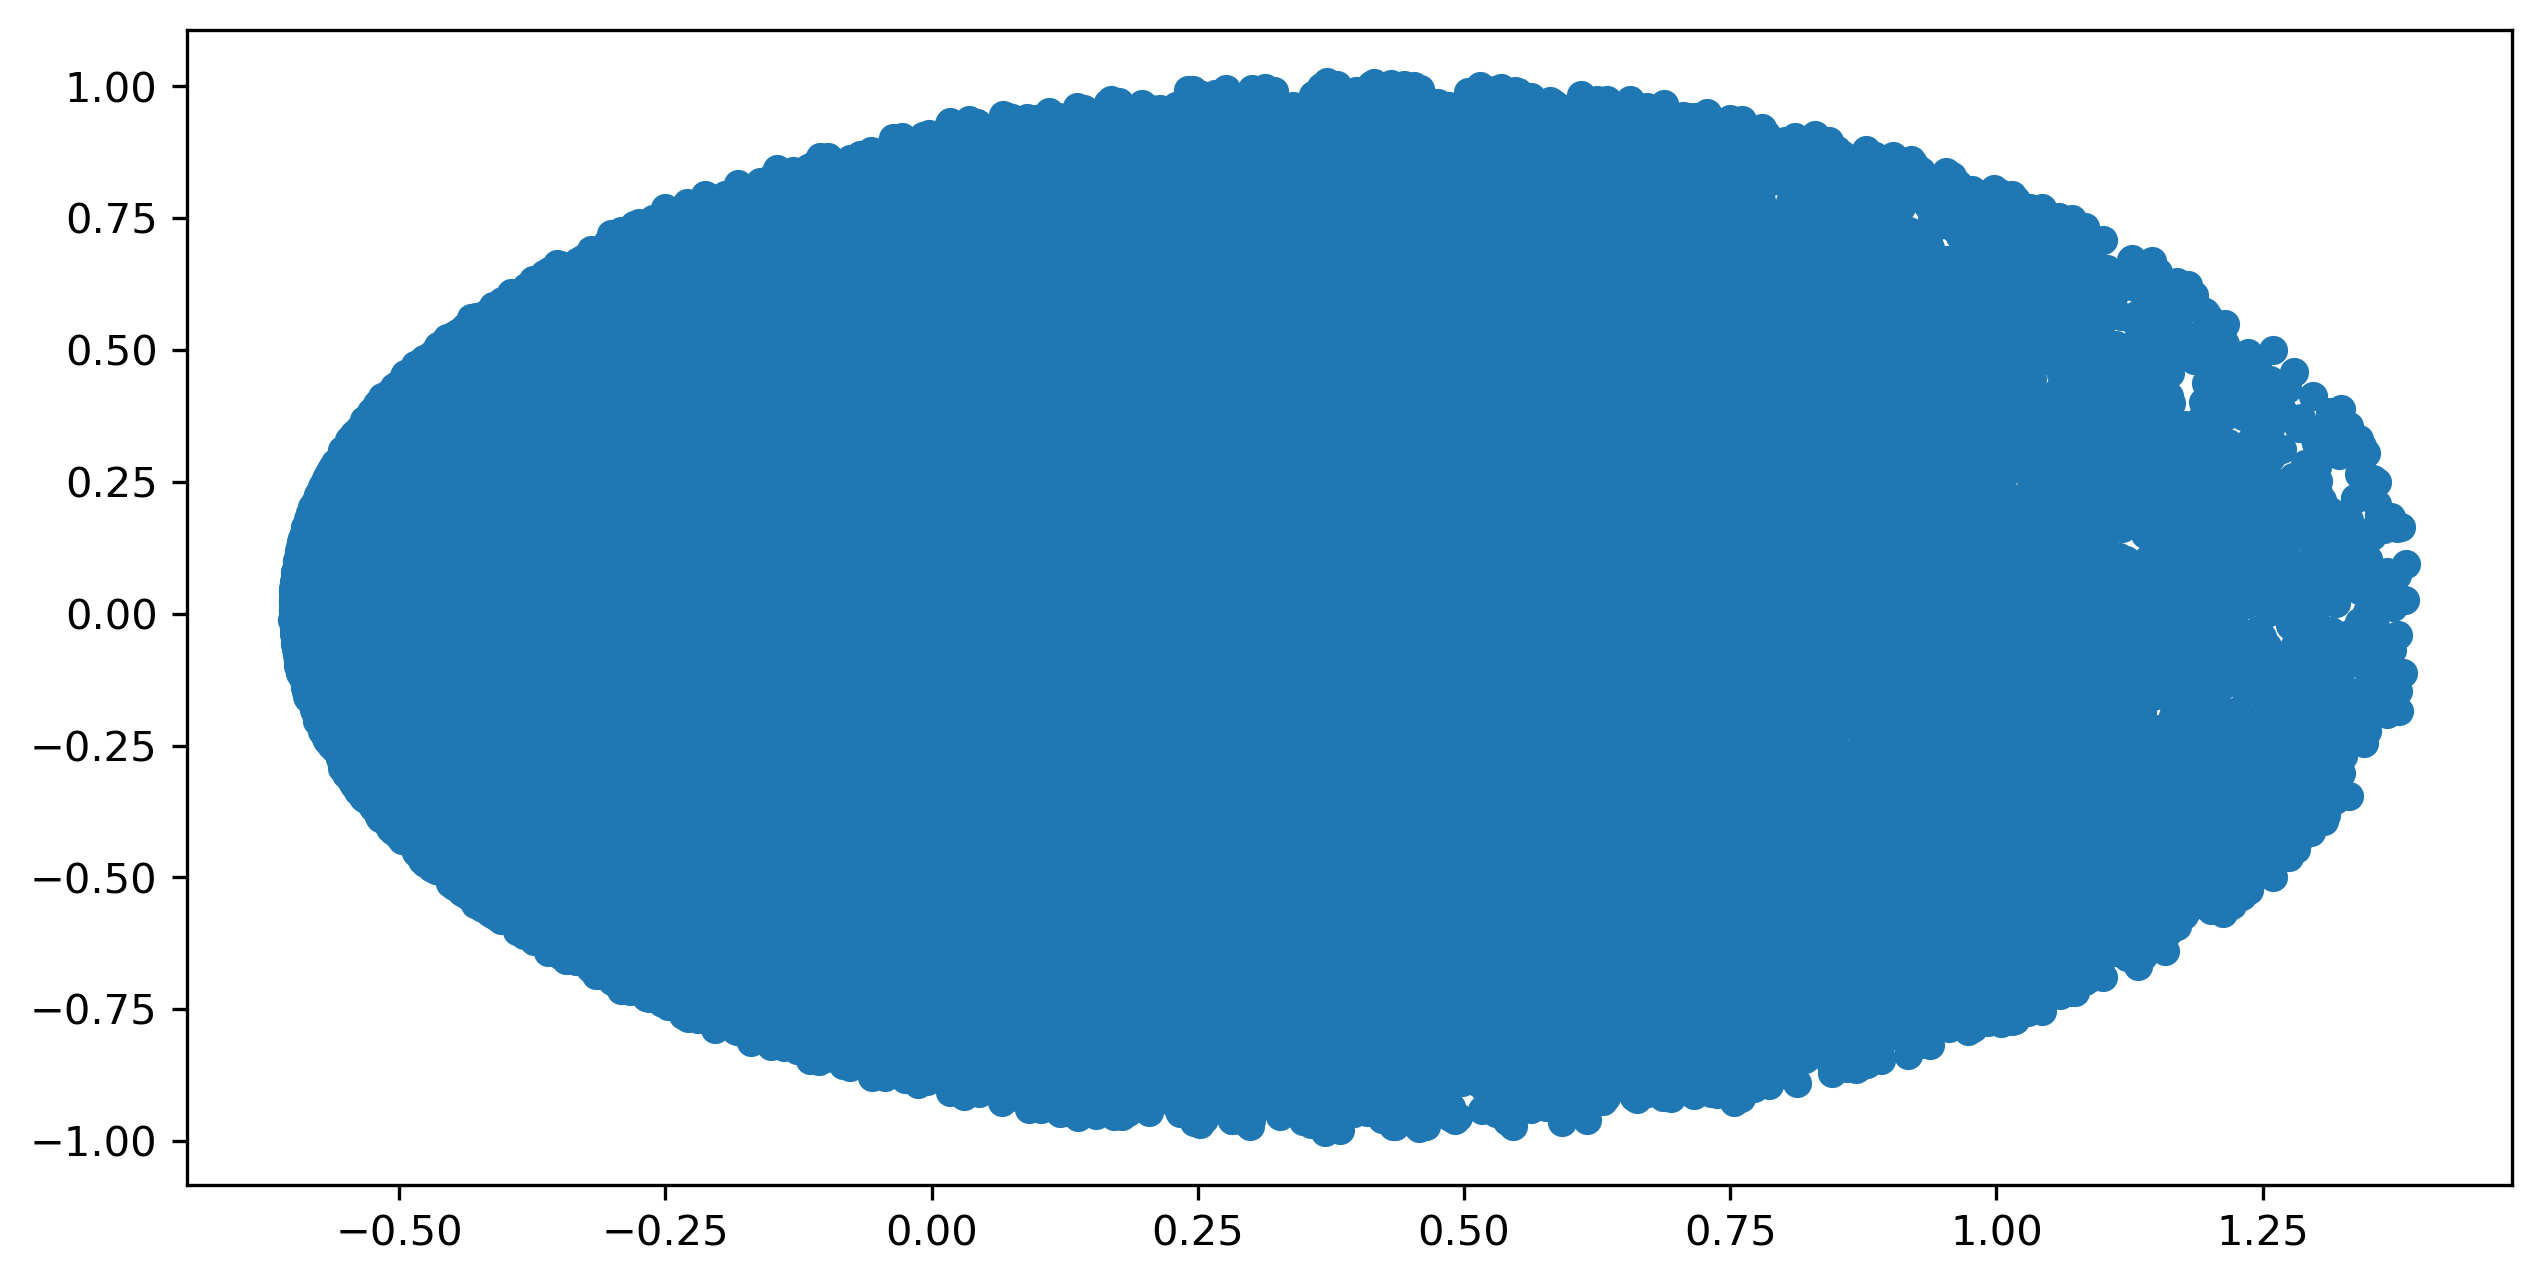

In [34]:
x = model.wv.get_normed_vectors()
pca = PCA(n_components=2)
result = pca.fit_transform(x)
plt.scatter(result[:, 0], result[:, 1])
words = list

In [35]:
plt.scatter(result[:, 0], result[:, 1])

words = list(model.wv.index_to_key)

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

C:\Users\Connor\miniconda3\envs\370\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Connor\miniconda3\envs\370\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Connor\miniconda3\envs\370\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Connor\miniconda3\envs\370\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Connor\miniconda3\envs\370\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_fi

ValueError: Image size of 83652x1284 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3000x1500 with 1 Axes>